<a href="https://colab.research.google.com/github/okaybuyukdeveci/MLprojects/blob/main/Fashion_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.0/158.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 73.1 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=b6e6eda759b0fb810e1c5e26cc735b9de760c4215e1314569c403963701d187e
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [2]:
from openml.datasets import get_dataset
import openml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
fashion_mnist = openml.datasets.get_dataset('Fashion-MNIST')

In [4]:
X, y, _, _ = fashion_mnist.get_data(dataset_format="dataframe")

In [5]:
X.shape

(70000, 785)

In [6]:
from sklearn.datasets import fetch_openml
mnist_fashion = fetch_openml('Fashion-MNIST')

In [7]:
mnist_fashion.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
mnist_fashion['target']

,class
0,9
1,0
2,0
3,3
4,0
...,...
69995,9
69996,1
69997,8
69998,1


In [9]:
mnist_fashion['url']

'https://www.openml.org/d/40996'

In [10]:
X = mnist_fashion['data']
y = mnist_fashion['target']

X.shape, y.shape

((70000, 784), (70000,))

In [11]:
classes = ['t-shirt','trouser','pullover','dress',
           'coat','sandal','shirt','sneaker','bag','ankle boot']

In [12]:
# visualize with 2*5 grid

plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] =100
digits = y.unique()
digits = [int(x) for x in digits]
digits.sort()
digits


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

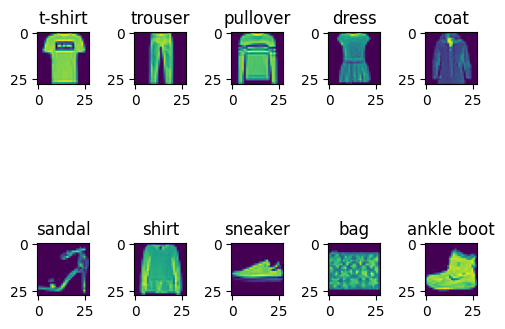

In [13]:
for i in digits:
  plt.subplot(2,5,i+1)
  plt.imshow(X[y==str(i)].iloc[0].to_numpy().reshape(28,28))
  plt.title(classes[i])


plt.tight_layout()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
y= y.astype('int')
y

,class
0,9
1,0
2,0
3,3
4,0
...,...
69995,9
69996,1
69997,8
69998,1


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

X_train.shape, X_test.shape

((56000, 784), (14000, 784))

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [24]:
def get_model():
  model=Sequential([
      Flatten(input_shape=(X.shape[1],)),
      Dense(128,activation='relu'),
      Dropout(0.3),
      Dense(64,activation='relu'),
      Dense(10,activation='softmax')
  ])
  return model

In [25]:
model = get_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Compile the model
model.compile(loss ='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [30]:
# Fit the model
history = model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5215 - loss: 6.2724 - val_accuracy: 0.6927 - val_loss: 0.7532
Epoch 2/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6048 - loss: 1.0712 - val_accuracy: 0.7000 - val_loss: 0.7253
Epoch 3/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6186 - loss: 1.0333 - val_accuracy: 0.6929 - val_loss: 0.7391
Epoch 4/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6143 - loss: 1.0144 - val_accuracy: 0.6850 - val_loss: 0.7453
Epoch 5/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6289 - loss: 0.9815 - val_accuracy: 0.7579 - val_loss: 0.6554
Epoch 6/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6364 - loss: 0.9543 - val_accuracy: 0.7079 - val_loss: 0.7319
Epoch 7/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6516 - loss: 0.8833 - val_accuracy: 0.7198 - val_loss: 0.6499
Epoch 8/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6714 - loss: 0.8319 - 

In [31]:
#Evaluate the model on the test sets
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7664 - loss: 0.6023

Test Accuracy: 0.7668


In [32]:
pred=model.predict(X_test)
idx=np.argmax(pred[0])
pred_class=classes[idx]
pred_class

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


'pullover'

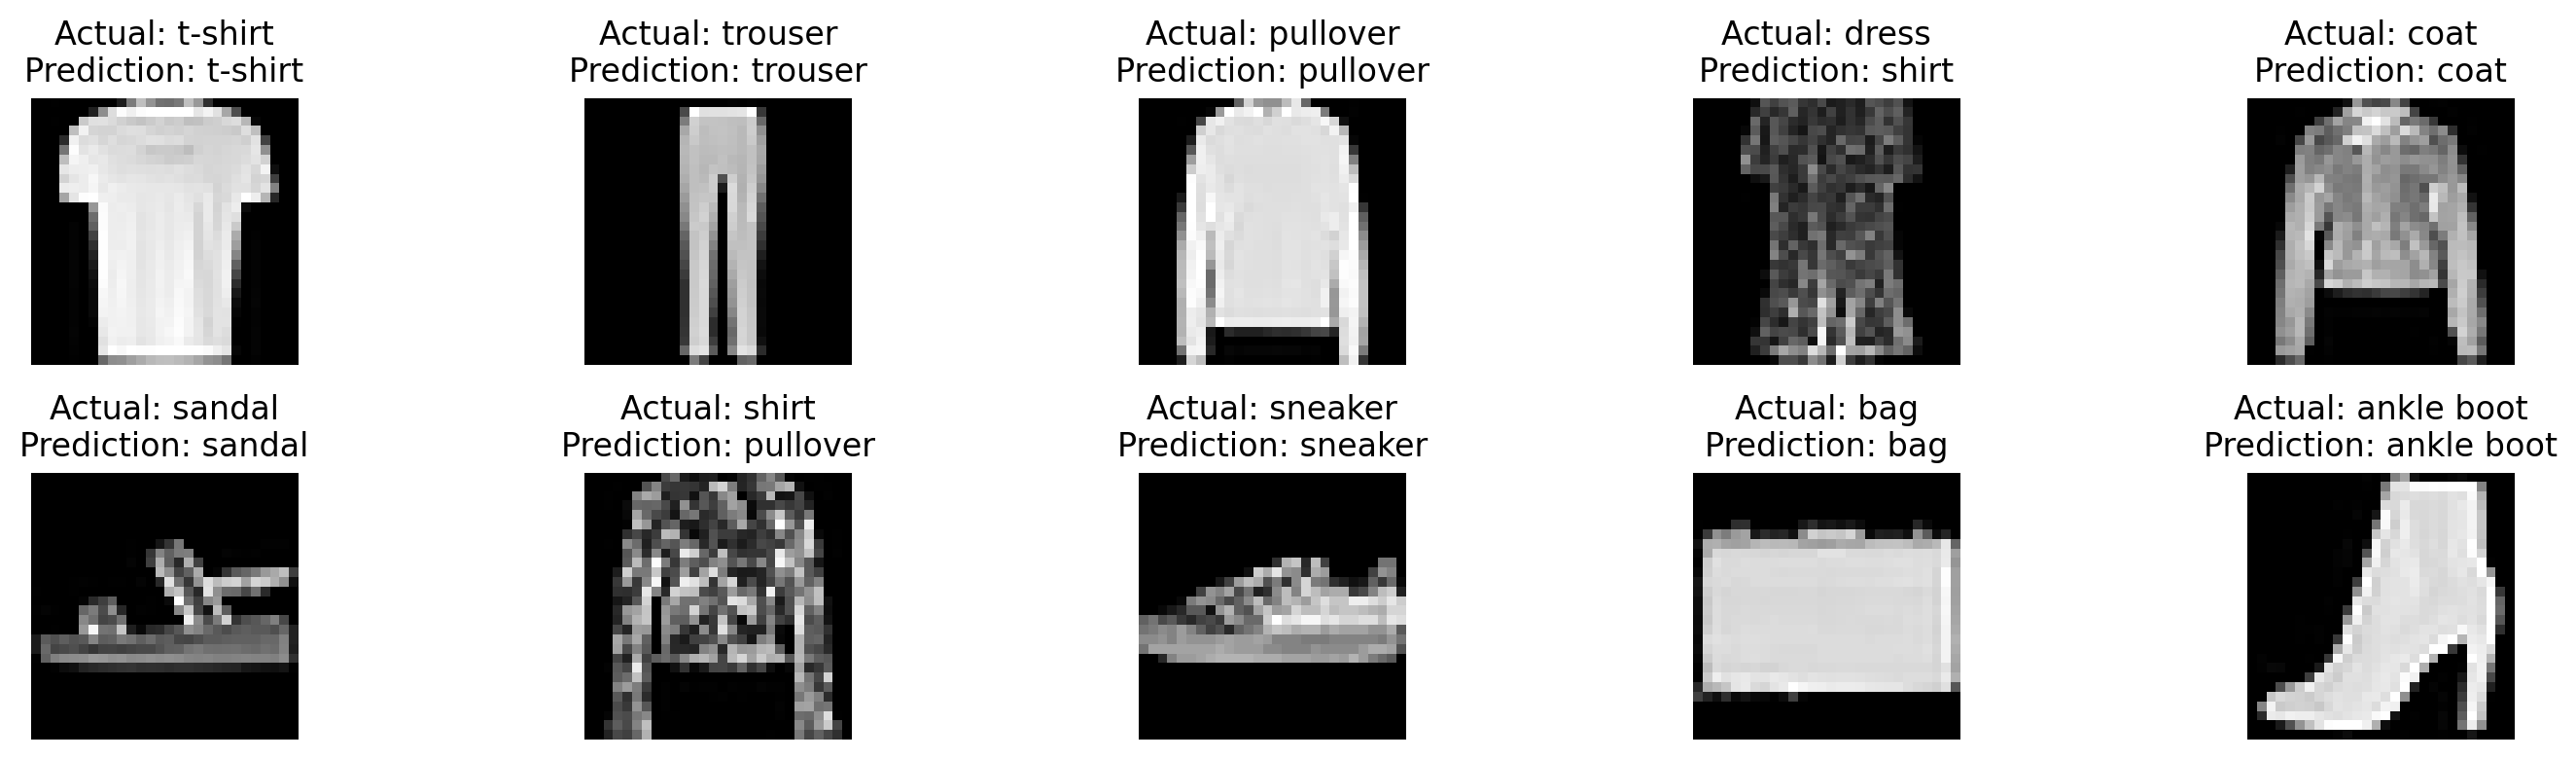

In [39]:
plt.rcParams['figure.figsize'] = (15, 4)  # Set the figure size for the plot
plt.rcParams['figure.dpi'] = 200          # Set the resolution of the figure

# Visualize class-based predictions in a 2x5 grid
for i in digits:
    plt.subplot(2, 5, i + 1)  # Create a subplot in a 2x5 grid for each class index

    # Extract the first example from the test set corresponding to class 'i'
    test = X_test[y_test == i].iloc[0].to_numpy()  # Convert the first matching test example to a NumPy array
    test_image = test.reshape(28, 28)  # Reshape the 1D array into a 28x28 image for visualization

    # Display the image
    plt.imshow(test_image, cmap='gray')

    # Make a prediction using the model (input must be a 1D vector)
    pred = model.predict(test.reshape(1, 784), verbose=0)  # Predict class probabilities for the test image
    idx = np.argmax(pred[0])  # Get the index of the class with the highest probability
    pred_class = classes[idx]  # Map index to class name for visualization

    # Set the plot title with actual and predicted class information
    plt.title(f"Actual: {classes[i]}\nPrediction: {pred_class}")
    plt.axis('off')  # Turn off axis labels for better visualization

plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()  # Display the plot
